In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from utils import *
from plotutils import *
from pymc3 import model_to_graphviz
plt.style.use("fivethirtyeight")

C:\Users\tanve\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\tanve\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
with pm.Model() as simple_cauchy:
    theta = pm.Cauchy('tau', 0, 5, shape = 10)

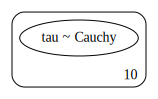

In [3]:
model_to_graphviz(simple_cauchy)

In [4]:
with simple_cauchy:
    trace = pm.sample(1000, cores = 1, chains = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [tau]
100%|██████████| 1500/1500 [00:22<00:00, 67.49it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [5]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
tau__0,-7.157411,103.302852,5.728026,-66.752308,68.678358,315.369824,1.005088
tau__1,-28.287350,379.046540,21.250288,-66.962415,89.048689,202.046866,1.009544
tau__2,44.481848,365.316331,30.272739,-88.011018,67.402654,62.316630,1.031626
tau__3,0.279504,28.693456,1.120465,-52.060702,48.893044,582.052617,1.003755
tau__4,4.252995,44.740308,2.392924,-74.498526,66.735823,337.734645,1.012131
tau__5,6.196253,68.844300,3.367330,-83.182974,64.153772,378.812627,1.010840
tau__6,0.123850,34.352233,0.886485,-50.296583,60.632169,821.096969,1.000187
tau__7,1.041827,54.786724,1.302057,-42.556722,60.863004,1050.313867,0.999845
tau__8,-5.526031,78.953730,4.602480,-52.240358,57.459281,229.058520,1.008110
tau__9,-1.914415,36.593024,1.196347,-57.255152,51.132484,935.498296,1.002418


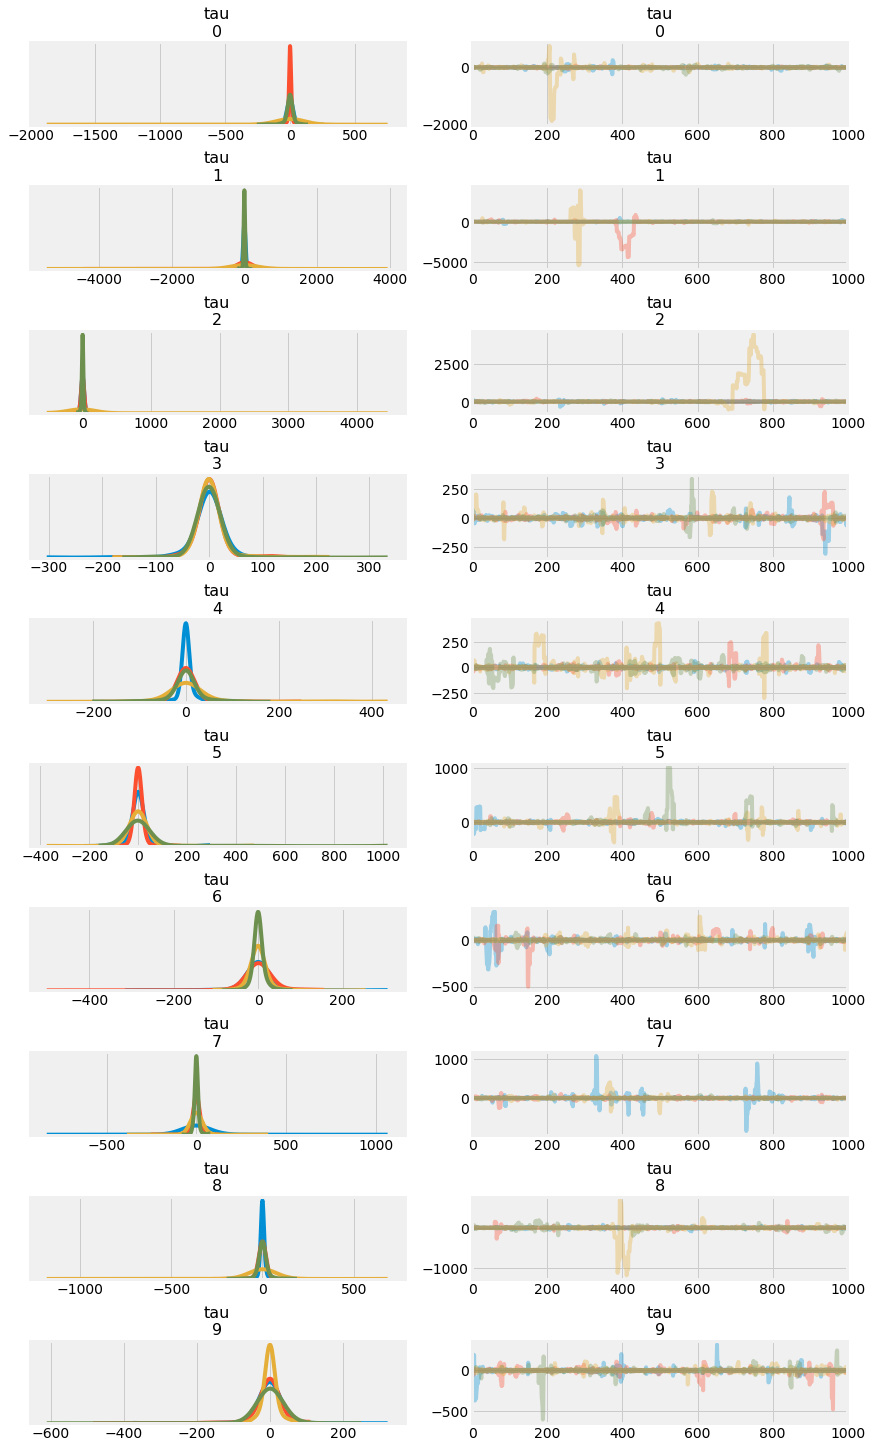

In [6]:
pm.traceplot(trace);

In [7]:
trace.get_values('tau', burn = 100, thin=10, chains=[0])[:,8]

array([-12.18663736, -32.96625337,   0.57667526,   1.41761009,
       -29.77980683,  15.18982186,  18.9074785 ,   0.92217177,
         2.00758017,   2.48677332,  -2.944958  ,  18.42994702,
         1.22886256,  -0.5446165 ,  -5.3645278 ,  -0.75843899,
        58.1297509 ,  -7.85828911, -13.08205359,   2.56907894,
         1.57865349,   2.13298503,  32.97208576,  11.85724439,
        -2.44961693,  34.08332034,   4.88564533,  -1.58684144,
        -3.27701167,  24.63963747,  -9.04364706,  -0.6633199 ,
        -1.65858783,   3.05443524,  -0.45672476,  -2.3258437 ,
        -7.07865161,  -1.25126141,  15.48084921,  -7.45512621,
        -3.82501642,  -7.74814568,  -9.19418129,   8.05414622,
         8.75357919,  -3.39657787,   3.68543605,  -1.43315204,
       -62.49998553,  27.87859131,  -1.05024711,  11.83181437,
        -2.73975524,  -3.47302769,  -2.92120739,  -7.92319061,
         3.36740328,   9.39790679,  -3.31439143,   2.97294018,
       -16.78096191,  -0.48079694,  -4.60586961,   1.66

In [8]:
traces_by_chain = np.zeros((4, 1000))

for i in range(4):
    #traces_by_chain[i] = np.array(trace['tau'])[:,8][i*1000:(i+1)*1000]
    traces_by_chain[i] = trace.get_values('tau', chains=[i])[:,4]

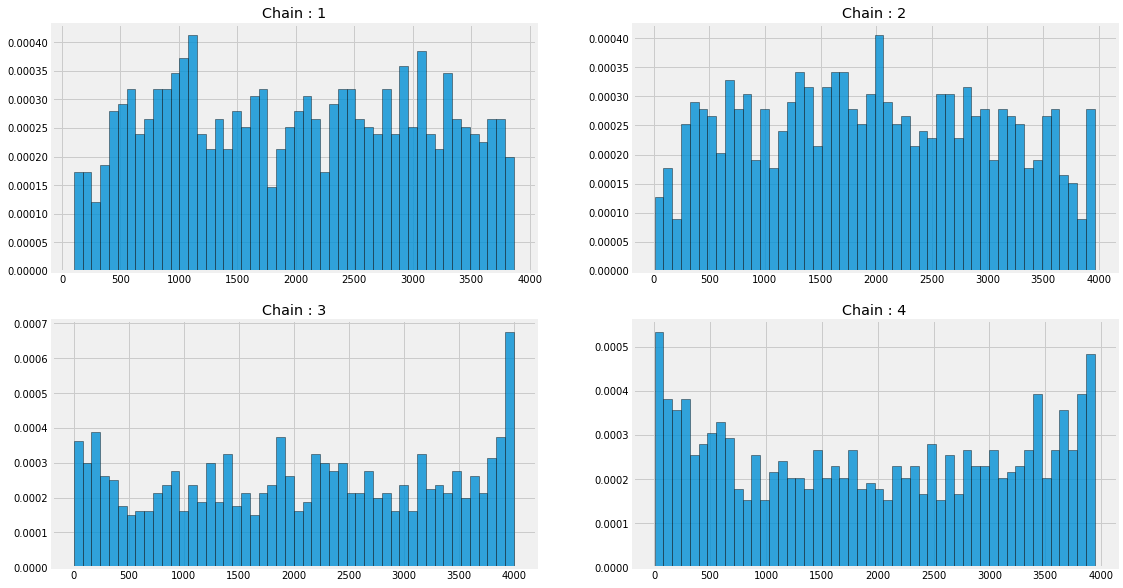

In [9]:
rankplot(traces_by_chain, 4, 2, 2)

In [ ]:
np